In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import itertools
import pandas as pd
import numpy as np
from utils.predictiveNet import PredictiveNet
import matplotlib.pyplot as plt
from utils.general import saveFig
from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis

from analysis.OfflineActivityAnalysis import SpontaneousActivityAnalysis
from utils.agent import RandomActionAgent
from analysis.DiffusionReplayAnalysis import DiffusionReplayAnalysis
from copy import deepcopy




In [11]:
savefolder = 'Figures/S17_adaptation/'

In [12]:
#Example Net
netname = 'thRNN_5win'
seed = 102
netfolder = '/maskedk_panel/'
predictiveNet_k6 = PredictiveNet.loadNet(netfolder+netname+'-SpeedHD-s'+str(seed))

Net Loaded from pathname


In [13]:
#netname = netname_mask
ex_b =  1
ex_tau = 100

/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:340: RuntimeWarning: invalid value encountered in divide
  fxfr = fx / fr
/home/mila/d/daniel.levenstein/venvs/PredictiveReplay/lib/python3.8/site-packages/pynapple/process/tuning_curves.py:351: RuntimeWarning: invalid value encountered in divide
  SI = SI / fr[:, 0, 0]


Training Decoder on cuda...
loss: 5.849550 [    0\10000]
loss: 0.427161 [ 1000\10000]
loss: 0.269379 [ 2000\10000]
loss: 0.197137 [ 3000\10000]
loss: 0.155948 [ 4000\10000]
loss: 0.125799 [ 5000\10000]
loss: 0.103143 [ 6000\10000]
loss: 0.089082 [ 7000\10000]
loss: 0.078333 [ 8000\10000]
loss: 0.067836 [ 9000\10000]
loss: 0.059357 [ 9999\10000]
Training Complete. Back to the cpu
Training Decoder on cuda...
loss: 1.382112 [    0\10000]
loss: 0.007133 [ 1000\10000]
loss: 0.003409 [ 2000\10000]
loss: 0.002003 [ 3000\10000]
loss: 0.001263 [ 4000\10000]
loss: 0.000804 [ 5000\10000]
loss: 0.000511 [ 6000\10000]
loss: 0.000329 [ 7000\10000]
loss: 0.000208 [ 8000\10000]
loss: 0.000134 [ 9000\10000]
loss: 0.000086 [ 9999\10000]
Training Complete. Back to the cpu
Running SLEEP
Running WAKE


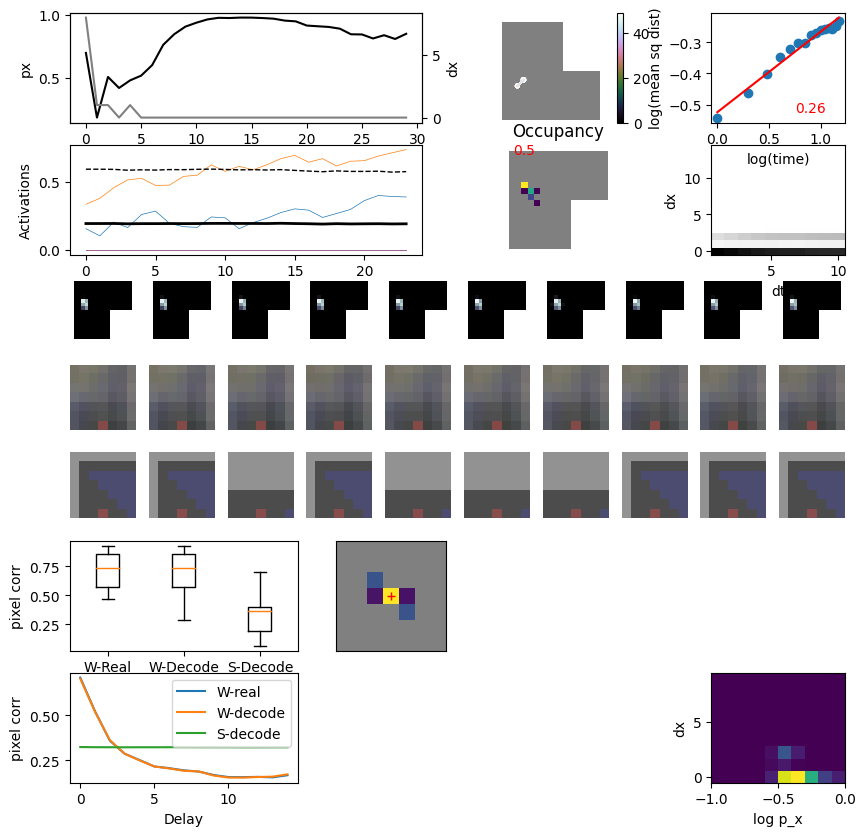

In [14]:
OTA = OfflineTrajectoryAnalysis(predictiveNet_k6, noisemag = 0, noisestd=0.03,
                               withIsomap=False, decoder='train',calculateViewSimilarity=True)
OTA.SpontTrajectoryFigure('base',savefolder, trajRange=(200,250))

In [15]:
DRA_base = DiffusionReplayAnalysis(predictiveNet_k6, decoder = OTA.decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = 0.03)

setting zero-values to min (0.01)


In [16]:
DRA_query = DiffusionReplayAnalysis(predictiveNet_k6, decoder = DRA_base.decoder,
                            compareWake=True, actionAgent=True,
                              noisestd = 0.03)

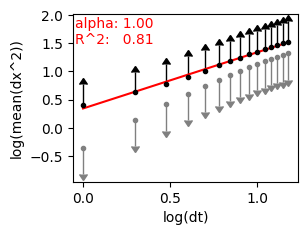

In [17]:
DRA_query.DiffusionFigure(netname+'query', savefolder)

/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/DiffusionReplayAnalysis.py:265: RuntimeWarning: divide by zero encountered in log10
  mean_msd = np.mean(np.log10(msd),axis=0, where=msd>0)
/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/DiffusionReplayAnalysis.py:266: RuntimeWarning: divide by zero encountered in log10
  std_msd = np.nanstd(np.log10(msd), where=msd>0)


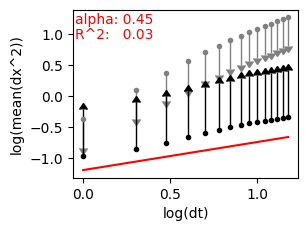

In [18]:
DRA_base.DiffusionFigure(netname+'nosie', savefolder)

Running SLEEP
Running WAKE


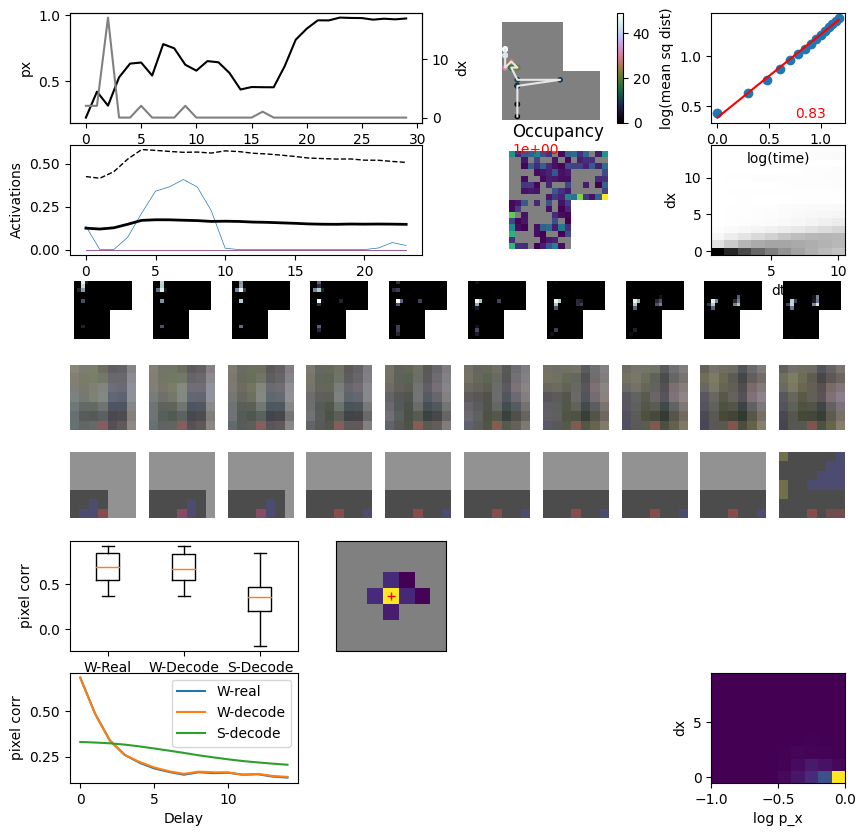

In [19]:
OTA_adapt = OfflineTrajectoryAnalysis(predictiveNet_k6, noisemag = 0, noisestd=0.03,
                               withIsomap=False, decoder=DRA_base.decoder,
                               withAdapt=True, b_adapt = ex_b, tau_adapt=ex_tau,
                               calculateViewSimilarity=True)
OTA_adapt.SpontTrajectoryFigure('adapt',savefolder, trajRange=(100,150))

In [20]:
DRA_adapt = DiffusionReplayAnalysis(predictiveNet_k6, decoder = DRA_base.decoder,
                            compareWake=True, actionAgent=None,
                              noisestd = 0.03,withAdapt=True, b_adapt = ex_b, tau_adapt=ex_tau)

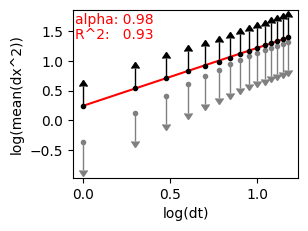

In [21]:
DRA_adapt.DiffusionFigure(netname+'adapt', savefolder)

In [22]:
OTA_adaptHD = OfflineTrajectoryAnalysis(predictiveNet_k6, noisemag = 0, noisestd=0.03,
                                   withIsomap=False, decoder = DRA_base.decoder, 
                                      actionAgent='HDOnly',
                                      withAdapt=True, b_adapt = ex_b, tau_adapt=ex_tau,
                                      calculateViewSimilarity=True,
                                       compareWake=True)
DRA_adaptHD = DiffusionReplayAnalysis(predictiveNet_k6, decoder = DRA_base.decoder,
                            compareWake=True, actionAgent='HDOnly',
                              noisestd = 0.03,withAdapt=True,
                                    b_adapt = ex_b, tau_adapt=ex_tau)

Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


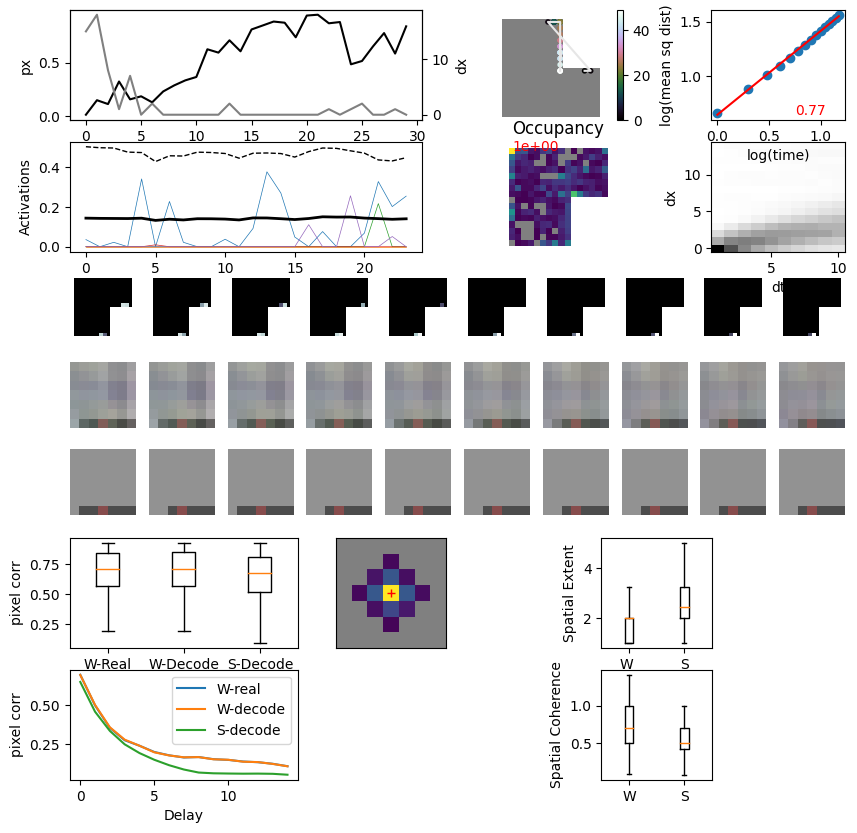

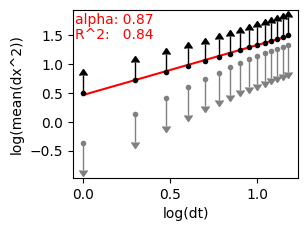

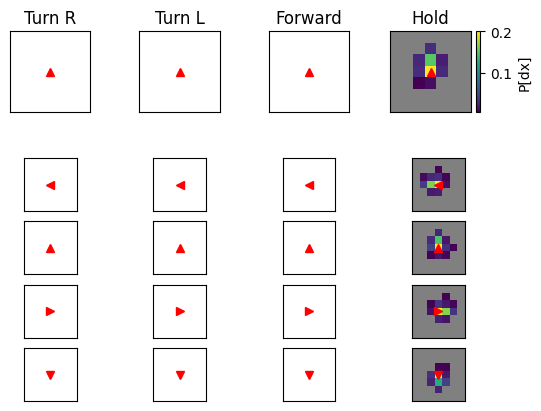

In [23]:
OTA_adaptHD.SpontTrajectoryFigure('adaptHD',savefolder, trajRange=(225,275))
DRA_adaptHD.DiffusionFigure(netname+'adaptHD', savefolder)
OTA_adaptHD.transitionProbabilityFigure(netname+'adaptHD',savefolder)

In [24]:
bs = np.linspace(0,1.5,16)
tau_as = np.logspace(np.log10(2),np.log10(1000),16)

alphas_Aonly = np.zeros((bs.size,tau_as.size))
ints_Aonly = np.zeros((bs.size,tau_as.size))
obssim_Aonly = np.zeros((bs.size,tau_as.size))
ext_Aonly = np.zeros((bs.size,tau_as.size))
coh_Aonly = np.zeros((bs.size,tau_as.size))

for bidx,b in enumerate(bs):
    print(bidx)
    for tidx,tau_a in enumerate(tau_as):
        #b = b*tau_a
        OTA_adapt = OfflineTrajectoryAnalysis(predictiveNet_k6, noisemag = 0, noisestd=0.03,
                                       withIsomap=False, decoder=DRA_base.decoder,
                                              actionAgent=None,
                                              timesteps_sleep=250,timesteps_wake = 500,
                                       withAdapt=True, b_adapt = b, tau_adapt=tau_a,
                                       calculateViewSimilarity=True)
        obssim_Aonly[bidx,tidx] = np.mean(OTA_adapt.ViewSimilarity['MSE_sleep'][0])
        ext_Aonly[bidx,tidx] = OTA_adapt.spatialCoherence_SLEEP['meanExtent']
        coh_Aonly[bidx,tidx] = OTA_adapt.spatialCoherence_SLEEP['meanCoherence']

        DRA_adapt = DiffusionReplayAnalysis(predictiveNet_k6, decoder = DRA_base.decoder,
                                            timesteps_sleep=300,
                            compareWake=False, actionAgent=None,
                              noisestd = 0.03, b_adapt = b, tau_adapt=tau_a,
                                           withAdapt=True)
        alphas_Aonly[bidx,tidx] = DRA_adapt.diffusionFit['alpha']
        ints_Aonly[bidx,tidx] = DRA_adapt.diffusionFit['intercept']
        
        

0
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
Running SLEEP
Running WAKE
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
1
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running SLEEP
Running WAKE
Running SLEEP
Running WAKE
setting zero-values to min (0.01)
Running

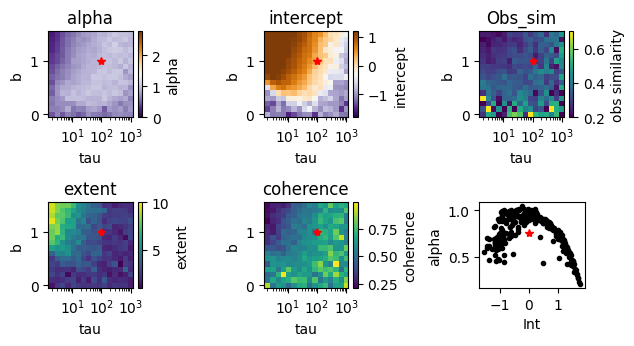

In [31]:
wakealpha = DRA_base.diffusionFit_WAKE['alpha']
wakeint = DRA_base.diffusionFit_WAKE['intercept']

sleepalpha = DRA_adapt.diffusionFit['alpha']
sleepint = DRA_adapt.diffusionFit['intercept']


plt.figure()
plt.subplot(3,3,1)
plt.pcolormesh(tau_as,bs,alphas_Aonly,cmap='PuOr_r', vmin = 0*wakealpha,
              vmax = 2*wakealpha)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")

plt.xlabel('tau')
plt.ylabel('b')
plt.title('alpha')
plt.colorbar(label='alpha')

plt.subplot(3,3,2)
plt.pcolormesh(tau_as,bs,ints_Aonly,cmap='PuOr_r', vmin = wakeint-1.5,
              vmax = wakeint+1.5)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")
plt.xlabel('tau')
plt.ylabel('b')
plt.title('intercept')
plt.colorbar(label='intercept')
plt.tight_layout()

plt.subplot(3,3,3)
plt.pcolormesh(tau_as,bs,obssim_Aonly,
              vmin=0.2, vmax=0.7)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")
plt.xlabel('tau')
plt.ylabel('b')
plt.title('Obs_sim')
plt.colorbar(label='obs similarity')

plt.subplot(3,3,4)
plt.pcolormesh(tau_as,bs,ext_Aonly,
              vmin=1, vmax=10)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")
plt.xlabel('tau')
plt.ylabel('b')
plt.title('extent')
plt.colorbar(label='extent')

plt.subplot(3,3,5)
plt.pcolormesh(tau_as,bs,coh_Aonly)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")
plt.xlabel('tau')
plt.ylabel('b')
plt.title('coherence')
plt.colorbar(label='coherence')

plt.subplot(3,3,6)
plt.plot(ints_Aonly,alphas_Aonly,'k.')
#plt.plot(wakeint,wakealpha,'*r')
plt.plot(sleepint,sleepalpha,'*r')
plt.xlabel('Int')
plt.ylabel('alpha')

plt.tight_layout()

saveFig(plt.gcf(),netname+'_adaptationparms_noHD',savefolder,
        filetype='pdf')
plt.show()

In [26]:
#bs = np.linspace(0,1,16)
#tau_as = np.logspace(np.log10(2),np.log10(32),16)

alphas = np.zeros((bs.size,tau_as.size))
ints = np.zeros((bs.size,tau_as.size))
obssim = np.zeros((bs.size,tau_as.size))
ext = np.zeros((bs.size,tau_as.size))
coh = np.zeros((bs.size,tau_as.size))

for bidx,b in enumerate(bs):
    print(bidx)
    for tidx,tau_a in enumerate(tau_as):
        #b = b*tau_a
        OTA_adapt = OfflineTrajectoryAnalysis(predictiveNet_k6, noisemag = 0, noisestd=0.03,
                                       withIsomap=False, decoder=DRA_base.decoder,
                                              actionAgent='HDOnly',
                                              timesteps_sleep=250,timesteps_wake = 500,
                                       withAdapt=True, b_adapt = b, tau_adapt=tau_a,
                                       calculateViewSimilarity=True)
        obssim[bidx,tidx] = np.mean(OTA_adapt.ViewSimilarity['MSE_sleep'][0])
        ext[bidx,tidx] = OTA_adapt.spatialCoherence_SLEEP['meanExtent']
        coh[bidx,tidx] = OTA_adapt.spatialCoherence_SLEEP['meanCoherence']

        DRA_adapt = DiffusionReplayAnalysis(predictiveNet_k6, decoder = DRA_base.decoder,
                                            timesteps_sleep=300,
                            compareWake=False, actionAgent='HDOnly',
                              noisestd = 0.03, b_adapt = b, tau_adapt=tau_a,
                                           withAdapt=True)
        alphas[bidx,tidx] = DRA_adapt.diffusionFit['alpha']
        ints[bidx,tidx] = DRA_adapt.diffusionFit['intercept']
        
        

0
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
1
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
2
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
3
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
4
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
5
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
6
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
7
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
8
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
9
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
10
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
11
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
12
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
13
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
14
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
15
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE
Running SLEEP


/home/mila/d/daniel.levenstein/PredictiveReplay/analysis/OfflineTrajectoryAnalysis.py:225: RuntimeWarning: invalid value encountered in divide
  transitionhist = transitionhist/np.sum(transitionhist[:])


Running WAKE


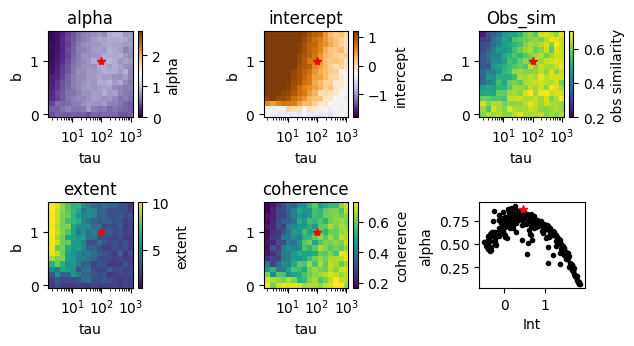

In [32]:
wakealpha = DRA_base.diffusionFit_WAKE['alpha']
wakeint = DRA_base.diffusionFit_WAKE['intercept']

sleepalpha = DRA_adaptHD.diffusionFit['alpha']
sleepint = DRA_adaptHD.diffusionFit['intercept']


plt.figure()
plt.subplot(3,3,1)
plt.pcolormesh(tau_as,bs,alphas,cmap='PuOr_r', vmin = 0*wakealpha,
              vmax = 2*wakealpha)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")

plt.xlabel('tau')
plt.ylabel('b')
plt.title('alpha')
plt.colorbar(label='alpha')

plt.subplot(3,3,2)
plt.pcolormesh(tau_as,bs,ints,cmap='PuOr_r', vmin = wakeint-1.5,
              vmax = wakeint+1.5)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")
plt.xlabel('tau')
plt.ylabel('b')
plt.title('intercept')
plt.colorbar(label='intercept')
plt.tight_layout()

plt.subplot(3,3,3)
plt.pcolormesh(tau_as,bs,obssim,
              vmin=0.2, vmax=0.7)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")
plt.xlabel('tau')
plt.ylabel('b')
plt.title('Obs_sim')
plt.colorbar(label='obs similarity')

plt.subplot(3,3,4)
plt.pcolormesh(tau_as,bs,ext,
              vmin=1, vmax=10)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")
plt.xlabel('tau')
plt.ylabel('b')
plt.title('extent')
plt.colorbar(label='extent')

plt.subplot(3,3,5)
plt.pcolormesh(tau_as,bs,coh)
plt.plot(ex_tau, ex_b,'r*')
#plt.yscale("log")
plt.xscale("log")
plt.xlabel('tau')
plt.ylabel('b')
plt.title('coherence')
plt.colorbar(label='coherence')

plt.subplot(3,3,6)
plt.plot(ints,alphas,'k.')
#plt.plot(wakeint,wakealpha,'*r')
plt.plot(sleepint,sleepalpha,'*r')
plt.xlabel('Int')
plt.ylabel('alpha')

plt.tight_layout()

saveFig(plt.gcf(),netname+'_adaptationparms_HD',savefolder,
        filetype='pdf')
plt.show()

In [35]:
DRA_panel_adapt = DiffusionReplayAnalysis(predictiveNet_k6, decoder = DRA_base.decoder,
                                    timesteps_sleep=1000,
                    compareWake=True, actionAgent=None,
                      noisestd = 0.03, withAdapt=True,b_adapt = ex_b, tau_adapt=ex_tau)
DRA_panel_adapt.runSTDPanel(minStd = 0.003,numStds=15)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [36]:
DRA_panel = DiffusionReplayAnalysis(predictiveNet_k6, decoder = DRA_base.decoder,
                                    timesteps_sleep=1000,
                    compareWake=True, actionAgent=None,
                      noisestd = 0.03, withAdapt=False)
DRA_panel.runSTDPanel(minStd = 0.003,numStds=15)

setting zero-values to min (0.01)
0
setting zero-values to min (0.01)
1
setting zero-values to min (0.01)
2
setting zero-values to min (0.01)
3
setting zero-values to min (0.01)
4
setting zero-values to min (0.01)
5
setting zero-values to min (0.01)
6
7
8
setting zero-values to min (0.01)
9
10
11
12
13
14


In [37]:
DRA_panel_query = DiffusionReplayAnalysis(predictiveNet_k6, decoder = DRA_base.decoder,
                                    timesteps_sleep=1000,
                    compareWake=True, actionAgent=True,
                      noisestd = 0.03, withAdapt=False)
DRA_panel_query.runSTDPanel(minStd = 0.003,numStds=15)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


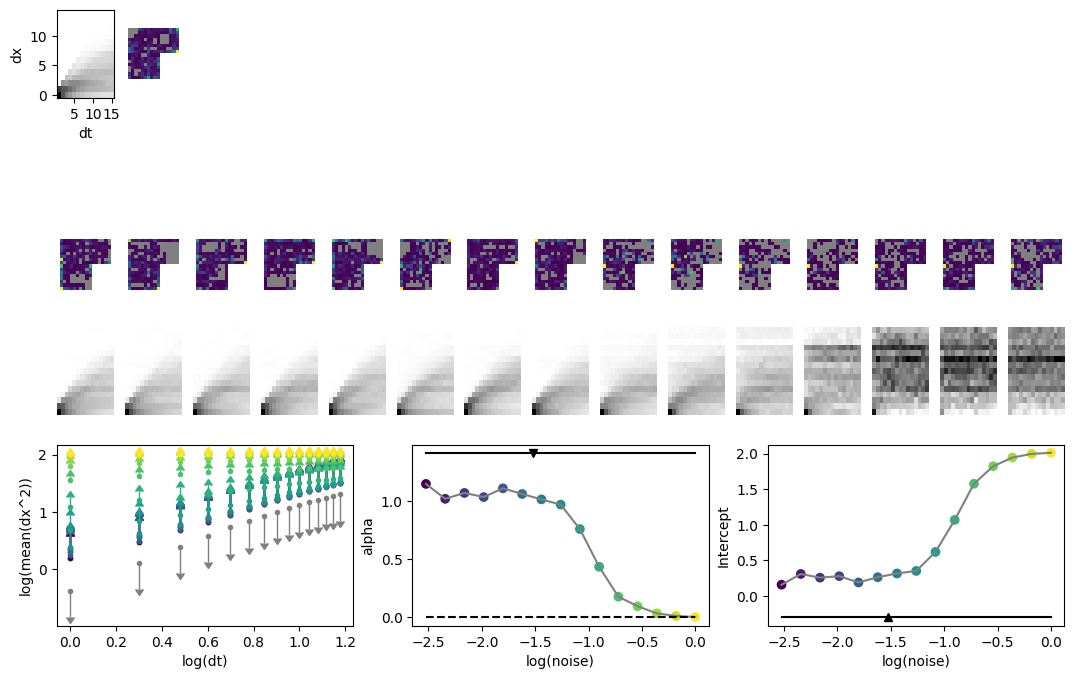

/home/mila/d/daniel.levenstein/PredictiveReplay/utils/DiffusionReplayAnalysis.py:232: RuntimeWarning: divide by zero encountered in log10
  mean_msd = np.mean(np.log10(msd),axis=0, where=msd>0)
/home/mila/d/daniel.levenstein/PredictiveReplay/utils/DiffusionReplayAnalysis.py:233: RuntimeWarning: divide by zero encountered in log10
  std_msd = np.nanstd(np.log10(msd), where=msd>0)


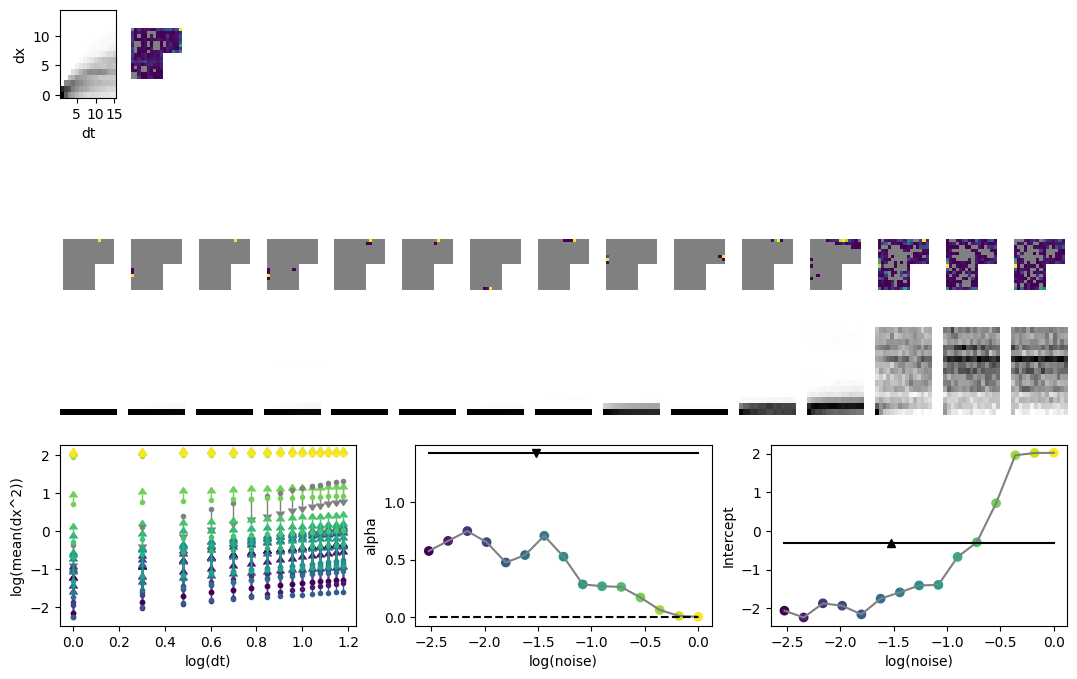

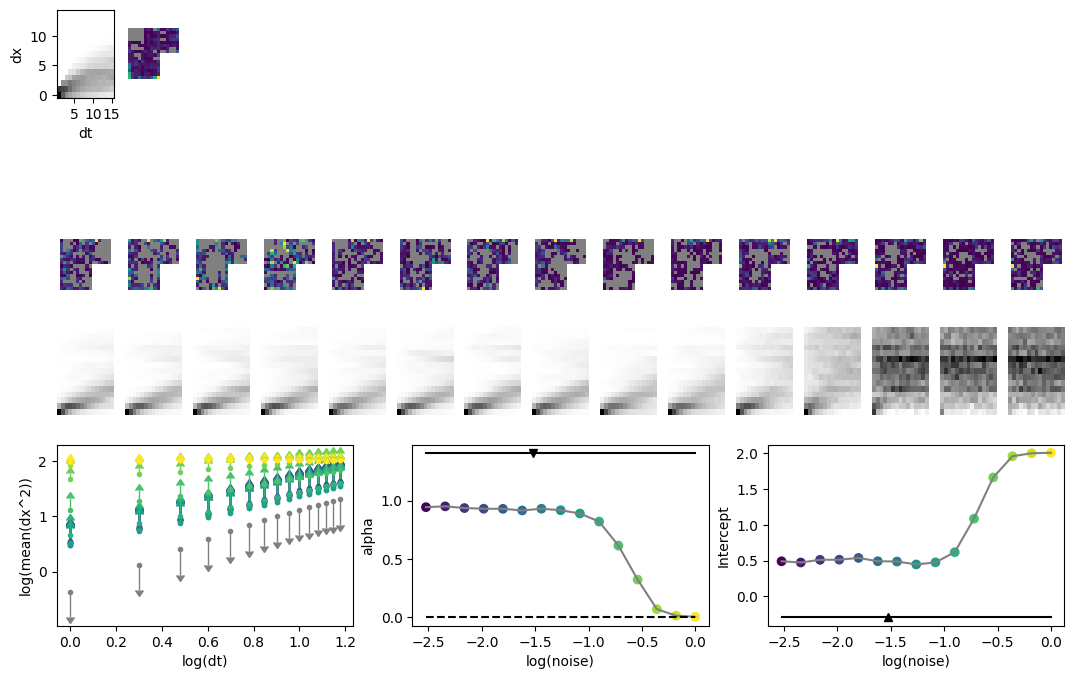

In [38]:
DRA_panel_query.STDPanelFigure(netname+'query',savefolder)
DRA_panel.STDPanelFigure(netname+'noise',savefolder)
DRA_panel_adapt.STDPanelFigure(netname+'adapt',savefolder)

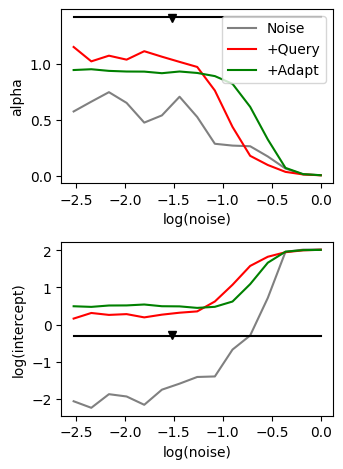

In [39]:
wakeNoise = predictiveNet_k6.trainNoiseMeanStd[1]
numnoise = len(DRA_panel_query.STDPanel['noisestds'])
plt.figure()
plt.subplot(2,2,1)
plt.plot(np.log10(DRA_panel.STDPanel['noisestds']),DRA_panel.STDPanel['alpha'],'grey')
plt.plot(np.log10(DRA_panel_query.STDPanel['noisestds']),DRA_panel_query.STDPanel['alpha'],'red')
plt.plot(np.log10(DRA_panel_adapt.STDPanel['noisestds']),DRA_panel_adapt.STDPanel['alpha'],'green')

#plt.plot(np.log10(DRA_panel_query.STDPanel['noisestds']),np.zeros(numnoise),'k--')
plt.plot(np.log10(DRA_panel_query.STDPanel['noisestds']),
         DRA_panel_query.diffusionFit_WAKE['alpha']*np.ones(numnoise),'k')

plt.plot(np.log10(wakeNoise),DRA_panel_adapt.diffusionFit_WAKE['alpha'],'kv')
plt.xlabel('log(noise)')
plt.ylabel('alpha')
plt.legend(['Noise','+Query','+Adapt'],loc='upper right')

plt.subplot(2,2,3)
plt.plot(np.log10(DRA_panel.STDPanel['noisestds']),DRA_panel.STDPanel['intercept'],'grey')
plt.plot(np.log10(DRA_panel_query.STDPanel['noisestds']),DRA_panel_query.STDPanel['intercept'],'red')
plt.plot(np.log10(DRA_panel_adapt.STDPanel['noisestds']),DRA_panel_adapt.STDPanel['intercept'],'green')

plt.plot(np.log10(DRA_panel_query.STDPanel['noisestds']),
         DRA_panel_query.diffusionFit_WAKE['intercept']*np.ones(numnoise),'k')

plt.plot(np.log10(wakeNoise),DRA_panel_adapt.diffusionFit_WAKE['intercept'],'kv')
plt.xlabel('log(noise)')
plt.ylabel('log(intercept)')

plt.tight_layout()

saveFig(plt.gcf(),netname+'compareReplayMethods',savefolder,
        filetype='pdf')
plt.show()